In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/bank-additional-full.csv',sep = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.shape

(41188, 21)

In [4]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# EDA

In [5]:
df.drop(columns='duration', inplace=True)

In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(1784)

In [9]:
df[df.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
104,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39985,27,admin.,single,high.school,no,no,no,cellular,jun,tue,2,999,0,nonexistent,-1.7,94.055,-39.8,0.761,4991.6,yes
40401,31,student,single,unknown,no,yes,no,cellular,aug,thu,2,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40404,41,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40806,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

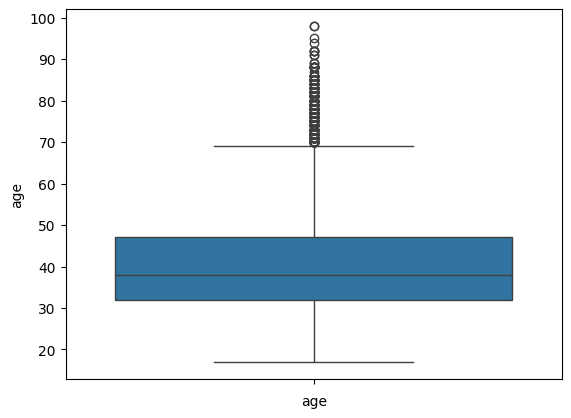

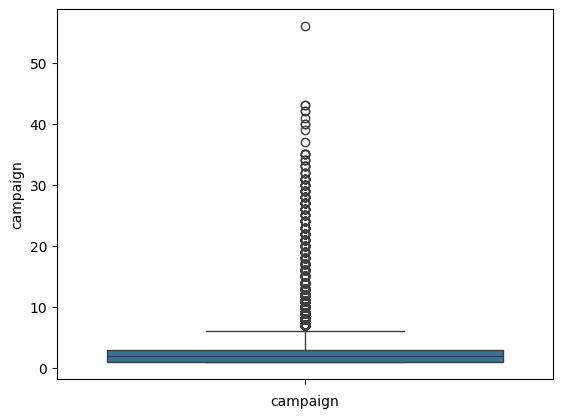

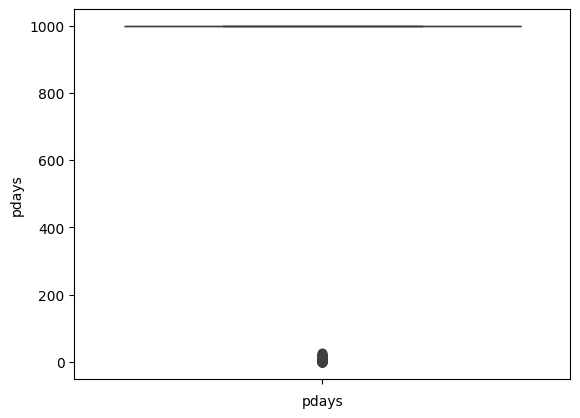

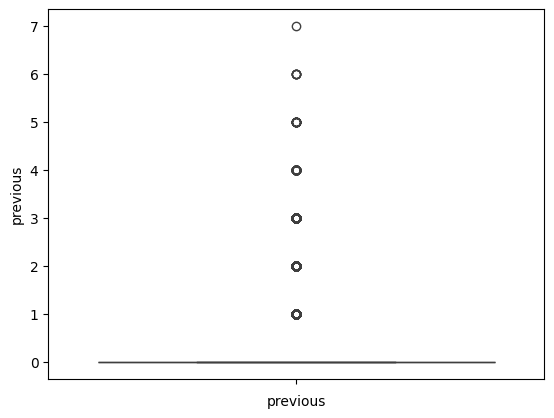

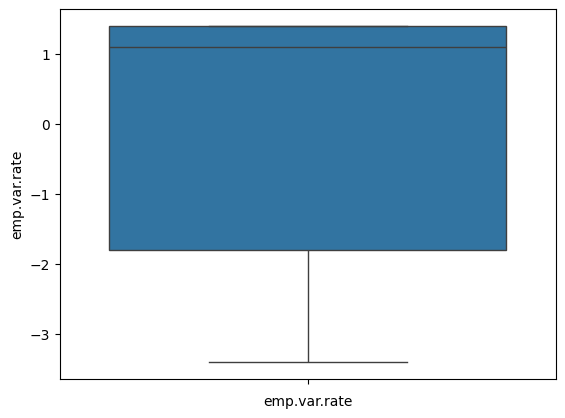

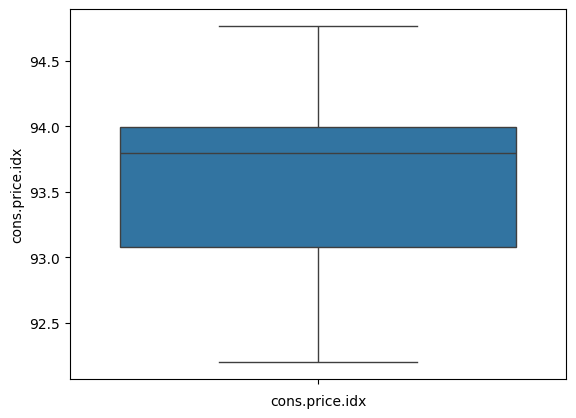

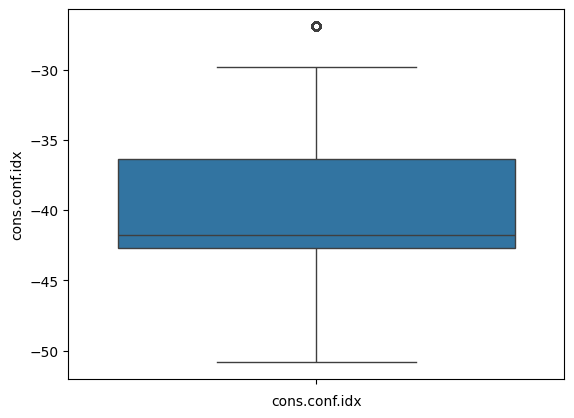

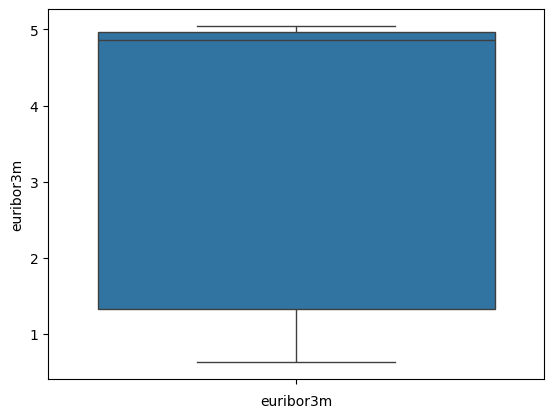

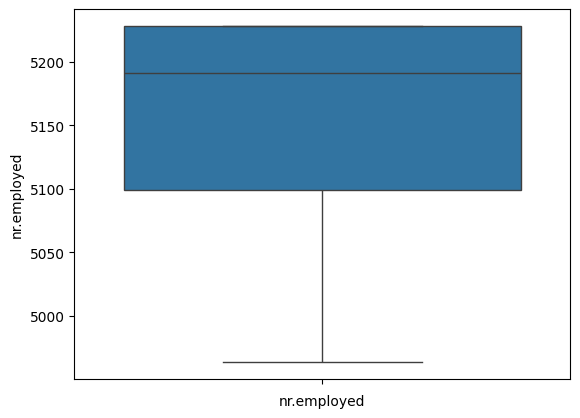

In [14]:
for col in df.columns:
  if (df[col].dtype != 'object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [15]:
out_list = ['age','campaign','cons.conf.idx']
for col in out_list:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  LB = Q1 - 1.5*IQR
  UB = Q3 + 1.5*IQR
  df = df[(df[col] >= LB) & (df[col] <= UB)]

In [16]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


# Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
Le = LabelEncoder()

In [19]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = Le.fit_transform(df[col])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36178 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36178 non-null  int64  
 1   job             36178 non-null  int64  
 2   marital         36178 non-null  int64  
 3   education       36178 non-null  int64  
 4   default         36178 non-null  int64  
 5   housing         36178 non-null  int64  
 6   loan            36178 non-null  int64  
 7   contact         36178 non-null  int64  
 8   month           36178 non-null  int64  
 9   day_of_week     36178 non-null  int64  
 10  campaign        36178 non-null  int64  
 11  pdays           36178 non-null  int64  
 12  previous        36178 non-null  int64  
 13  poutcome        36178 non-null  int64  
 14  emp.var.rate    36178 non-null  float64
 15  cons.price.idx  36178 non-null  float64
 16  cons.conf.idx   36178 non-null  float64
 17  euribor3m       36178 non-null  floa

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [22]:
x = df.drop('y',axis = 1)
y = df['y']

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif_df = pd.DataFrame()

In [25]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [26]:
vif_df['Features'] = x.columns
vif_df

,Features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [27]:
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

In [28]:
x.values

array([[ 5.6000e+01,  3.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 4.6000e+01,  1.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 5.6000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  9.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [29]:
vif_values

[np.float64(21.966070454402285),
 np.float64(2.1145506549496322),
 np.float64(5.649477190442339),
 np.float64(4.533743331984292),
 np.float64(1.413485603539284),
 np.float64(2.2006336441987937),
 np.float64(1.217608863310311),
 np.float64(2.9352697164395147),
 np.float64(6.604836798011407),
 np.float64(3.0848606627114044),
 np.float64(3.665084550934581),
 np.float64(164.62831996241005),
 np.float64(6.028234902206734),
 np.float64(33.49721624624969),
 np.float64(37.49454522440212),
 np.float64(36695.73121886002),
 np.float64(143.30284378596946),
 np.float64(317.7508900878543),
 np.float64(41995.18904624725)]

In [30]:
vif_df['Mulcolinarity'] = vif_values

In [31]:
vif_df

,Features,Mulcolinarity
0,age,21.966070
1,job,2.114551
2,marital,5.649477
3,education,4.533743
4,default,1.413486
5,housing,2.200634
6,loan,1.217609
7,contact,2.935270
8,month,6.604837
9,day_of_week,3.084861


In [32]:
x.drop('nr.employed',axis = 1,inplace = True)
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028


In [33]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,age,21.958629
1,job,2.114409
2,marital,5.648510
3,education,4.531664
4,default,1.410297
5,housing,2.200178
6,loan,1.217517
7,contact,2.468746
8,month,5.711382
9,day_of_week,3.084226


In [34]:
x.drop('cons.price.idx',axis = 1,inplace = True)

In [35]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,age,20.768073
1,job,2.108771
2,marital,5.496358
3,education,4.476751
4,default,1.410286
5,housing,2.198755
6,loan,1.217080
7,contact,2.371250
8,month,5.669544
9,day_of_week,3.066477


In [36]:
x.drop('pdays',axis = 1,inplace = True)

In [37]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,age,19.894134
1,job,2.105691
2,marital,5.379182
3,education,4.426096
4,default,1.410241
5,housing,2.195607
6,loan,1.216909
7,contact,2.301345
8,month,5.625194
9,day_of_week,3.053601


In [38]:
x.drop('euribor3m',axis = 1,inplace = True)

In [39]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,age,16.983749
1,job,2.099141
2,marital,5.187809
3,education,4.277073
4,default,1.409908
5,housing,2.187525
6,loan,1.216483
7,contact,2.289988
8,month,5.248013
9,day_of_week,3.012393


In [40]:
x.drop('cons.conf.idx',axis = 1,inplace = True)

In [41]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,age,10.519901
1,job,2.089816
2,marital,4.300933
3,education,4.177050
4,default,1.409069
5,housing,2.152500
6,loan,1.212707
7,contact,2.268380
8,month,4.850603
9,day_of_week,2.943193


In [42]:
x.drop('age',axis = 1,inplace = True)

In [43]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,job,2.065035
1,marital,4.291795
2,education,3.979094
3,default,1.322478
4,housing,2.097685
5,loan,1.209040
6,contact,2.266805
7,month,4.548502
8,day_of_week,2.842802
9,campaign,3.217133


In [44]:
x.drop('poutcome',axis = 1,inplace = True)

In [45]:
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
vif_values = []
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['Mulcolinarity'] = vif_values
vif_df

,Features,Mulcolinarity
0,job,2.042861
1,marital,4.034238
2,education,3.721585
3,default,1.310552
4,housing,2.059338
5,loan,1.206251
6,contact,2.248569
7,month,4.390682
8,day_of_week,2.732719
9,campaign,3.071028


In [46]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.70,random_state = 23)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(x_test)

In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
y_test

,y
3700,0
19202,0
18436,0
24181,0
37541,0
...,...
30121,0
7919,0
9077,0
36926,1


In [55]:
from sklearn.metrics import *

In [56]:
accuracy_score(y_test,y_pred) * 100

88.46594274432378

In [57]:
confusion_matrix(y_test,y_pred)

array([[22326,    70],
       [ 2851,    78]])

In [58]:
((22326 + 78) / (2851 + 70 + 22326 + 78)) * 100

88.46594274432378